Hurst exponent (H) = 0.5102


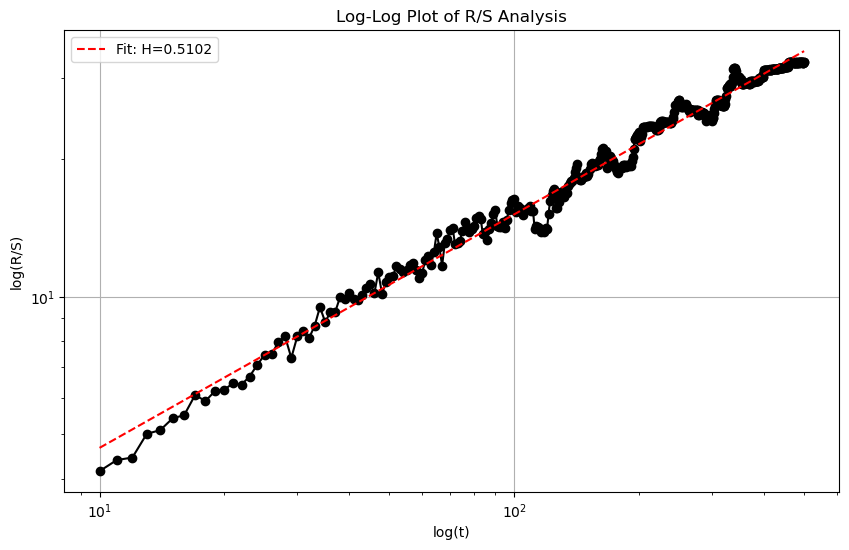

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def compute_RS(series, min_window=10, max_window=None):
    if max_window is None:
        max_window = len(series) // 2
    n = len(series)
    t_values = []
    RS_values = []

    # Criação da série acumulada
    Y = np.cumsum(series - np.mean(series))

    for t in range(min_window, max_window + 1):
        max_window_ranges = []
        # Dividindo a série em blocos de tamanho t
        for start in range(0, n, t):
            end = start + t
            if end > n:
                break
            # Cálculo do R/S para o bloco
            block = Y[start:end]
            R = np.max(block) - np.min(block)
            S = np.std(series[start:end])
            if S != 0:
                max_window_ranges.append(R / S)
        
        # Média dos valores de R/S para cada tamanho de janela t
        RS = np.mean(max_window_ranges)
        t_values.append(t)
        RS_values.append(RS)

    return t_values, RS_values

def hurst_exponent(t_values, RS_values):
    # Cálculo do log de t e log de RS
    log_t = np.log(t_values)
    log_RS = np.log(RS_values)
    # Regressão linear para encontrar a inclinação
    slope, intercept, r_value, p_value, std_err = linregress(log_t, log_RS)
    return slope, intercept, r_value, p_value, std_err

# Exemplo de série de dados
np.random.seed(0)
data = np.random.randn(1000)

# Cálculo de R/S
t_vals, RS_vals = compute_RS(data)

# Estimativa de Hurst
H, c, r, p, stderr = hurst_exponent(t_vals, RS_vals)
print(f"Hurst exponent (H) = {H:.4f}")

# Plotando em escala log-log
plt.figure(figsize=(10, 6))
plt.loglog(t_vals, RS_vals, marker='o', linestyle='-', color='black')
plt.title('Log-Log Plot of R/S Analysis')
plt.xlabel('log(t)')
plt.ylabel('log(R/S)')
plt.grid(True)

# Linha de regressão
plt.loglog(t_vals, np.exp(c) * np.power(t_vals, H), 'r--', label=f'Fit: H={H:.4f}')
plt.legend()
plt.show()


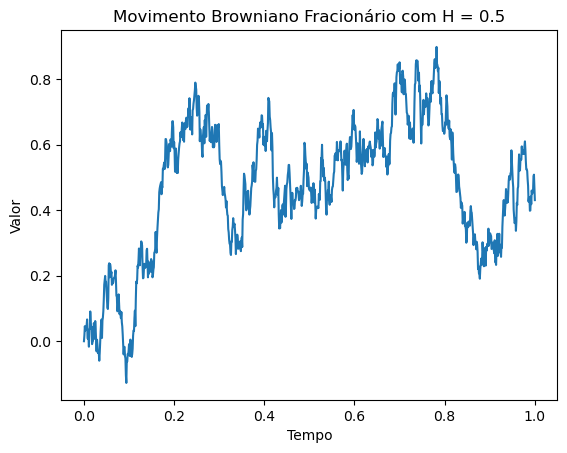

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fbm import FBM

# Parâmetros
H = 0.5  # Índice de Hurst
T = 1.0   # Tempo final
N = 1000  # Número de pontos

# Geração do Movimento Browniano Fracionário
fbm = FBM(n=N, hurst=H, length=T, method='daviesharte')
x = fbm.fbm()

# Visualização da Trajetória
plt.plot(np.linspace(0, T, N+1), x)
plt.title('Movimento Browniano Fracionário com H = {}'.format(H))
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.show()


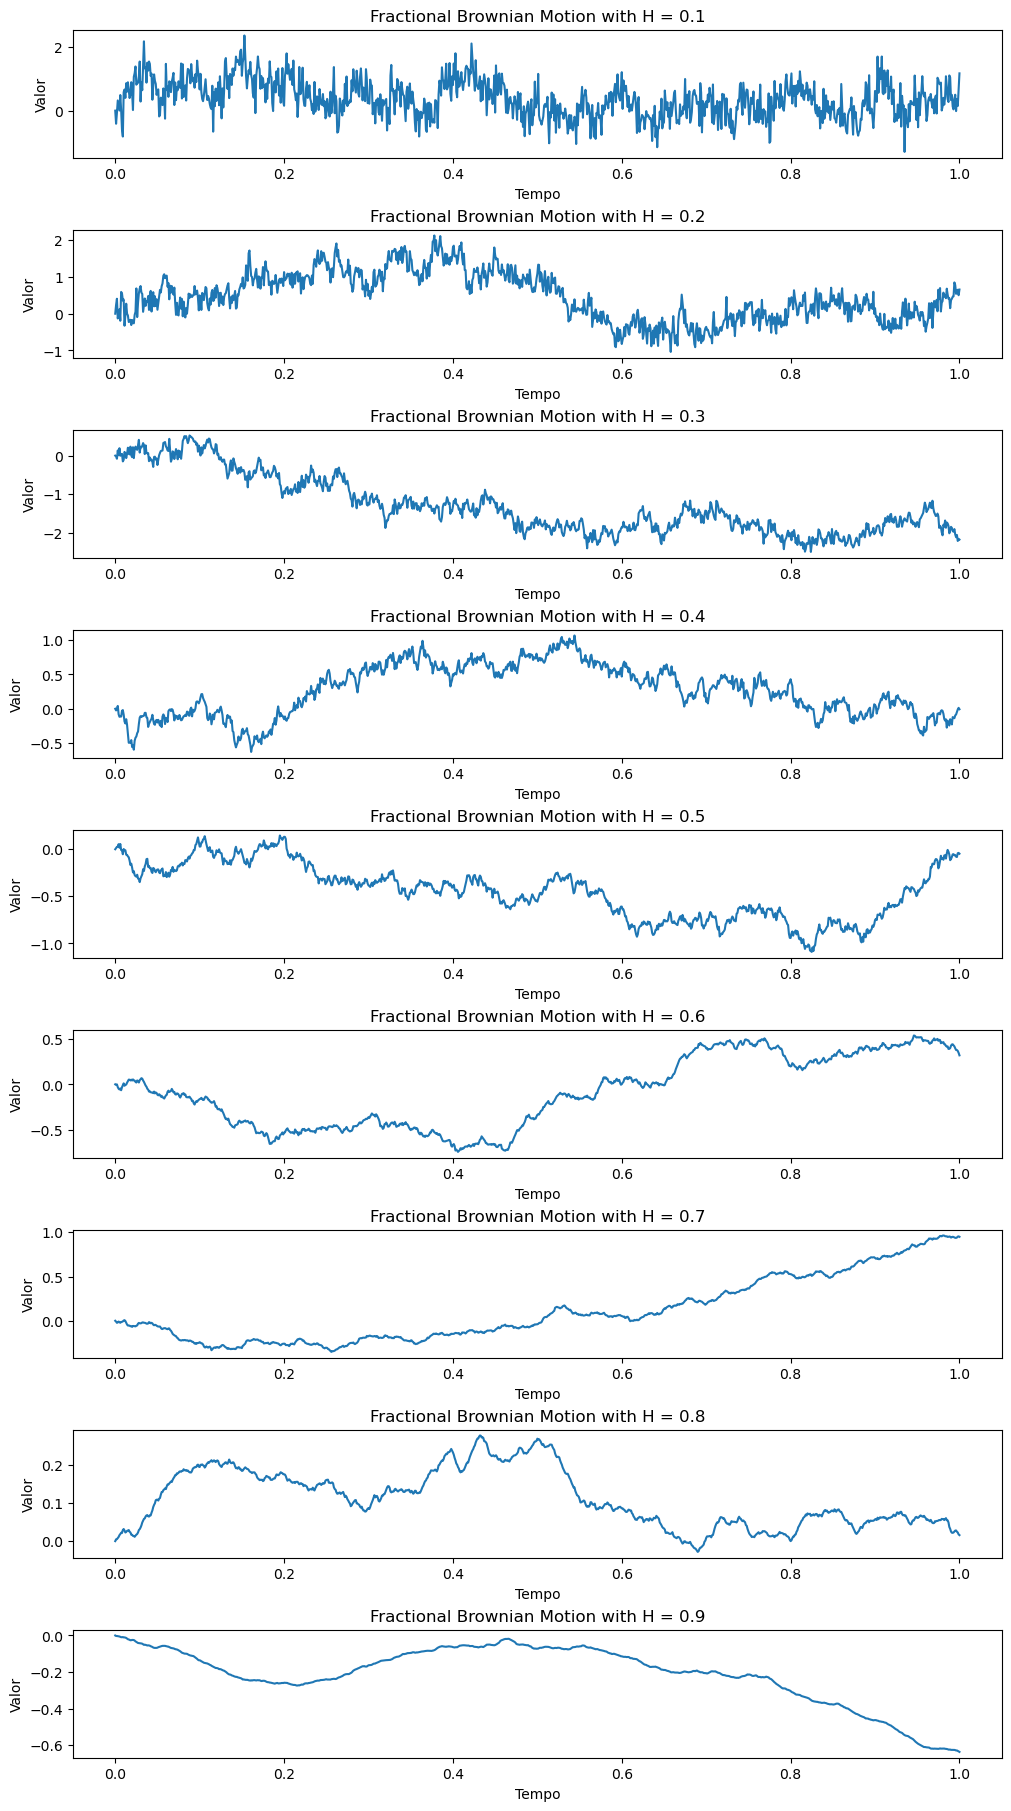

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from fbm import FBM

# Parâmetros
T = 1.0   # Tempo final
N = 1000  # Número de pontos
hurst_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # Valores do índice de Hurst

# Criar a figura e os subplots
fig, axs = plt.subplots(len(hurst_values), 1, figsize=(10, 18), constrained_layout=True)

for i, H in enumerate(hurst_values):
    # Geração do Movimento Browniano Fracionário
    fbm = FBM(n=N, hurst=H, length=T, method='daviesharte')
    x = fbm.fbm()
    
    # Plotar a trajetória
    axs[i].plot(np.linspace(0, T, N+1), x)
    axs[i].set_title(f'Fractional Brownian Motion with H = {H}')
    axs[i].set_xlabel('Tempo')
    axs[i].set_ylabel('Valor')

plt.show()
